The results for selected model training runs are included below. The full logs are in "model notes.xlsx".

Model 1.0.0.35b.96 had the best performance in scoring high accuracy and recall and generalizing well to the MIAS data. We would guess that this is because it was trained on Dataset 9 which did not resize the raw images depending on the size of the ROI.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddsm_results = pd.read_csv("ddsm_results.csv")

In [3]:
# Results sorted by best accuracy
ddsm_results.sort_values("Test Accuracy", inplace=True, ascending=False)
ddsm_results

,Model,Classification,Dataset,XE Weight,Initialization,Layers,Epochs,Baseline,Test Accuracy,Test Recall,MIAS Acc,MIAS Recall,Notes
0,1.0.0.29b.8,B,8,2,Scratch,All,30,0.8333,0.9930,1.0000,0.2189,0.9831,NaN
14,1.0.0.46b.8.4,B,8,2,1.0.0.46b.6,All,10,0.8333,0.9896,0.9776,0.2746,0.9811,NaN
17,1.0.0.35b.98,B,9,6,Scratch,All,35,0.8333,0.9571,0.9012,0.8802,0.8173,Tuning hyperparameters
3,1.0.0.29l.14,L,6,2,Scratch,All,40,0.8376,0.9142,0.9353,0.1665,0.9663,NaN
1,1.0.0.29l.8,L,8,2,Scratch,All,35,0.8333,0.8890,0.9092,0.1462,0.9781,Unstable results
4,vgg_16.3.04b.9,B,9,2,Scratch,All,30,0.8333,0.8881,0.3589,0.9314,0.6517,NaN
6,vgg_16.3.04b.8.1,B,8,2,vgg_16.3.04l.6,FC,5,0.8333,0.8747,0.2951,0.3986,0.6553,NaN
10,1.0.0.46b.8.2,B,8,2,1.0.0.46l.8,FC,5,0.8333,0.8711,0.9434,0.2535,0.9749,Retrained only fc layers from 1.0.0.46l.8
15,1.0.0.28.2b.9,B,9,2,Scratch,All,20,0.8333,0.8675,0.2756,0.9165,0.5342,NaN
16,1.0.0.35b.94,B,9,4,Scratch,All,30,0.8333,0.8502,0.7438,0.7328,0.8870,NaN


I am skeptical of the results for models 1.0.0.29 as we were not able to replicate the results in future training runs. Models 1.0.0.29 and 1.0.0.46 also did not score well in both accuracy and recall on the MIAS data.

In [4]:
# remove any rows where the accuracy is below the baseline
ddsm_results_filtered = ddsm_results[ddsm_results["Test Accuracy"] > ddsm_results["Baseline"]]
ddsm_results_filtered

,Model,Classification,Dataset,XE Weight,Initialization,Layers,Epochs,Baseline,Test Accuracy,Test Recall,MIAS Acc,MIAS Recall,Notes
0,1.0.0.29b.8,B,8,2,Scratch,All,30,0.8333,0.9930,1.0000,0.2189,0.9831,NaN
14,1.0.0.46b.8.4,B,8,2,1.0.0.46b.6,All,10,0.8333,0.9896,0.9776,0.2746,0.9811,NaN
17,1.0.0.35b.98,B,9,6,Scratch,All,35,0.8333,0.9571,0.9012,0.8802,0.8173,Tuning hyperparameters
3,1.0.0.29l.14,L,6,2,Scratch,All,40,0.8376,0.9142,0.9353,0.1665,0.9663,NaN
1,1.0.0.29l.8,L,8,2,Scratch,All,35,0.8333,0.8890,0.9092,0.1462,0.9781,Unstable results
4,vgg_16.3.04b.9,B,9,2,Scratch,All,30,0.8333,0.8881,0.3589,0.9314,0.6517,NaN
6,vgg_16.3.04b.8.1,B,8,2,vgg_16.3.04l.6,FC,5,0.8333,0.8747,0.2951,0.3986,0.6553,NaN
10,1.0.0.46b.8.2,B,8,2,1.0.0.46l.8,FC,5,0.8333,0.8711,0.9434,0.2535,0.9749,Retrained only fc layers from 1.0.0.46l.8
15,1.0.0.28.2b.9,B,9,2,Scratch,All,20,0.8333,0.8675,0.2756,0.9165,0.5342,NaN
16,1.0.0.35b.94,B,9,4,Scratch,All,30,0.8333,0.8502,0.7438,0.7328,0.8870,NaN


In [5]:
# Results sorted by best recall
ddsm_results_filtered.sort_values("Test Recall", ascending=False)

,Model,Classification,Dataset,XE Weight,Initialization,Layers,Epochs,Baseline,Test Accuracy,Test Recall,MIAS Acc,MIAS Recall,Notes
0,1.0.0.29b.8,B,8,2,Scratch,All,30,0.8333,0.9930,1.0000,0.2189,0.9831,NaN
14,1.0.0.46b.8.4,B,8,2,1.0.0.46b.6,All,10,0.8333,0.9896,0.9776,0.2746,0.9811,NaN
10,1.0.0.46b.8.2,B,8,2,1.0.0.46l.8,FC,5,0.8333,0.8711,0.9434,0.2535,0.9749,Retrained only fc layers from 1.0.0.46l.8
3,1.0.0.29l.14,L,6,2,Scratch,All,40,0.8376,0.9142,0.9353,0.1665,0.9663,NaN
1,1.0.0.29l.8,L,8,2,Scratch,All,35,0.8333,0.8890,0.9092,0.1462,0.9781,Unstable results
17,1.0.0.35b.98,B,9,6,Scratch,All,35,0.8333,0.9571,0.9012,0.8802,0.8173,Tuning hyperparameters
16,1.0.0.35b.94,B,9,4,Scratch,All,30,0.8333,0.8502,0.7438,0.7328,0.8870,NaN
4,vgg_16.3.04b.9,B,9,2,Scratch,All,30,0.8333,0.8881,0.3589,0.9314,0.6517,NaN
6,vgg_16.3.04b.8.1,B,8,2,vgg_16.3.04l.6,FC,5,0.8333,0.8747,0.2951,0.3986,0.6553,NaN
15,1.0.0.28.2b.9,B,9,2,Scratch,All,20,0.8333,0.8675,0.2756,0.9165,0.5342,NaN


In [6]:
# Sort by best accuracy on MIAS data
ddsm_results_filtered.sort_values("MIAS Acc", ascending=False)

,Model,Classification,Dataset,XE Weight,Initialization,Layers,Epochs,Baseline,Test Accuracy,Test Recall,MIAS Acc,MIAS Recall,Notes
4,vgg_16.3.04b.9,B,9,2,Scratch,All,30,0.8333,0.8881,0.3589,0.9314,0.6517,NaN
15,1.0.0.28.2b.9,B,9,2,Scratch,All,20,0.8333,0.8675,0.2756,0.9165,0.5342,NaN
17,1.0.0.35b.98,B,9,6,Scratch,All,35,0.8333,0.9571,0.9012,0.8802,0.8173,Tuning hyperparameters
16,1.0.0.35b.94,B,9,4,Scratch,All,30,0.8333,0.8502,0.7438,0.7328,0.8870,NaN
6,vgg_16.3.04b.8.1,B,8,2,vgg_16.3.04l.6,FC,5,0.8333,0.8747,0.2951,0.3986,0.6553,NaN
14,1.0.0.46b.8.4,B,8,2,1.0.0.46b.6,All,10,0.8333,0.9896,0.9776,0.2746,0.9811,NaN
10,1.0.0.46b.8.2,B,8,2,1.0.0.46l.8,FC,5,0.8333,0.8711,0.9434,0.2535,0.9749,Retrained only fc layers from 1.0.0.46l.8
0,1.0.0.29b.8,B,8,2,Scratch,All,30,0.8333,0.9930,1.0000,0.2189,0.9831,NaN
3,1.0.0.29l.14,L,6,2,Scratch,All,40,0.8376,0.9142,0.9353,0.1665,0.9663,NaN
1,1.0.0.29l.8,L,8,2,Scratch,All,35,0.8333,0.8890,0.9092,0.1462,0.9781,Unstable results


In [7]:
# sorted by highest MIAS recall
ddsm_results_filtered.sort_values("MIAS Recall", ascending=False)

,Model,Classification,Dataset,XE Weight,Initialization,Layers,Epochs,Baseline,Test Accuracy,Test Recall,MIAS Acc,MIAS Recall,Notes
0,1.0.0.29b.8,B,8,2,Scratch,All,30,0.8333,0.9930,1.0000,0.2189,0.9831,NaN
14,1.0.0.46b.8.4,B,8,2,1.0.0.46b.6,All,10,0.8333,0.9896,0.9776,0.2746,0.9811,NaN
1,1.0.0.29l.8,L,8,2,Scratch,All,35,0.8333,0.8890,0.9092,0.1462,0.9781,Unstable results
10,1.0.0.46b.8.2,B,8,2,1.0.0.46l.8,FC,5,0.8333,0.8711,0.9434,0.2535,0.9749,Retrained only fc layers from 1.0.0.46l.8
3,1.0.0.29l.14,L,6,2,Scratch,All,40,0.8376,0.9142,0.9353,0.1665,0.9663,NaN
16,1.0.0.35b.94,B,9,4,Scratch,All,30,0.8333,0.8502,0.7438,0.7328,0.8870,NaN
17,1.0.0.35b.98,B,9,6,Scratch,All,35,0.8333,0.9571,0.9012,0.8802,0.8173,Tuning hyperparameters
6,vgg_16.3.04b.8.1,B,8,2,vgg_16.3.04l.6,FC,5,0.8333,0.8747,0.2951,0.3986,0.6553,NaN
4,vgg_16.3.04b.9,B,9,2,Scratch,All,30,0.8333,0.8881,0.3589,0.9314,0.6517,NaN
15,1.0.0.28.2b.9,B,9,2,Scratch,All,20,0.8333,0.8675,0.2756,0.9165,0.5342,NaN


# Results by Dataset

## Dataset 9

We focused on this dataset as the others resized the images based on the size of the ROI. This dataset did not, making models trained on it generalize the best to the MIAS data.

In [8]:
ddsm_results.loc[ddsm_results.Dataset == 9]

,Model,Classification,Dataset,XE Weight,Initialization,Layers,Epochs,Baseline,Test Accuracy,Test Recall,MIAS Acc,MIAS Recall,Notes
17,1.0.0.35b.98,B,9,6,Scratch,All,35,0.8333,0.9571,0.9012,0.8802,0.8173,Tuning hyperparameters
4,vgg_16.3.04b.9,B,9,2,Scratch,All,30,0.8333,0.8881,0.3589,0.9314,0.6517,NaN
15,1.0.0.28.2b.9,B,9,2,Scratch,All,20,0.8333,0.8675,0.2756,0.9165,0.5342,NaN
16,1.0.0.35b.94,B,9,4,Scratch,All,30,0.8333,0.8502,0.7438,0.7328,0.8870,NaN
7,1.0.0.46b.9,B,9,2,Scratch,All,35,0.8333,0.8242,0.0000,0.8811,0.0157,NaN
18,vgg_16.3.06b.9,B,9,6,Scratch,All,30,0.8333,0.8138,0.9884,0.4357,0.9797,NaN
13,inception_v4.05b.9,B,9,2,Scratch,All,20,0.8333,0.1828,1.0000,0.1066,1.0000,NaN


Model 1.0.0.35b.96 is the model which we feel has the best performance on the test dataset while generalizing well to the MIAS dataset.

## Dataset 8

While some models performed very well on Dataset 8, those models did not perform well on the MIAS dataset. They all traded off accuracy and recall.

In [9]:
ddsm_results.loc[ddsm_results.Dataset == 8]

,Model,Classification,Dataset,XE Weight,Initialization,Layers,Epochs,Baseline,Test Accuracy,Test Recall,MIAS Acc,MIAS Recall,Notes
0,1.0.0.29b.8,B,8,2,Scratch,All,30,0.8333,0.9930,1.0000,0.2189,0.9831,NaN
14,1.0.0.46b.8.4,B,8,2,1.0.0.46b.6,All,10,0.8333,0.9896,0.9776,0.2746,0.9811,NaN
1,1.0.0.29l.8,L,8,2,Scratch,All,35,0.8333,0.8890,0.9092,0.1462,0.9781,Unstable results
6,vgg_16.3.04b.8.1,B,8,2,vgg_16.3.04l.6,FC,5,0.8333,0.8747,0.2951,0.3986,0.6553,NaN
10,1.0.0.46b.8.2,B,8,2,1.0.0.46l.8,FC,5,0.8333,0.8711,0.9434,0.2535,0.9749,Retrained only fc layers from 1.0.0.46l.8
8,1.0.0.46b.8,B,8,2,Scratch,All,30,0.8333,0.5434,0.7549,0.0911,0.8136,NaN
9,1.0.0.46l.8,L,8,2,Scratch,All,20,0.8333,0.1139,1.0000,0.0325,0.9741,NaN


## Dataset 6

We stopped training on Dataset 6 after Dataset 9 was created. These results are just included as a reference.

In [10]:
ddsm_results.loc[ddsm_results.Dataset == 6]

,Model,Classification,Dataset,XE Weight,Initialization,Layers,Epochs,Baseline,Test Accuracy,Test Recall,MIAS Acc,MIAS Recall,Notes
3,1.0.0.29l.14,L,6,2,Scratch,All,40,0.8376,0.9142,0.9353,0.1665,0.9663,NaN
5,vgg_16.3.04l.6,L,6,2,Scratch,All,20,0.8376,0.8333,0.0288,0.4783,0.1759,NaN
2,1.0.0.29g.6,B,6,2,Scratch,All,35,0.8376,0.8299,0.0477,0.8224,0.0144,NaN
12,1.0.0.46l.6,L,6,2,Scratch,All,20,0.8376,0.1800,1.0000,0.1690,1.0000,NaN
11,1.0.0.46b.6,B,6,2,Scratch,All,20,0.8376,0.1800,1.0000,0.1690,1.0000,NaN


## Effect of Contrast and Threshold on Accuracy and Recall

In [6]:
# results of trained model 2.0.0.35b evaluated with different contrast and threshold levels
aug_results = pd.read_csv("eval_results.csv")

In [10]:
# contrast
contrast_1 = aug_results[aug_results.Contrast == 1]
contrast_15  = aug_results[aug_results.Contrast == 1.5]
contrast_2  = aug_results[aug_results.Contrast == 2]

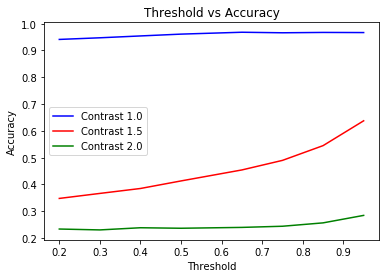

In [16]:
plt.plot(contrast_1.Threshold, contrast_1["Test Acc"], color="blue", label="Contrast 1.0")
plt.plot(contrast_15.Threshold, contrast_15["Test Acc"], color="red", label="Contrast 1.5")
plt.plot(contrast_2.Threshold, contrast_2["Test Acc"], color="green", label="Contrast 2.0")
plt.ylabel("Accuracy")
plt.xlabel("Threshold")
plt.legend()
plt.title("Threshold vs Accuracy")
plt.show()

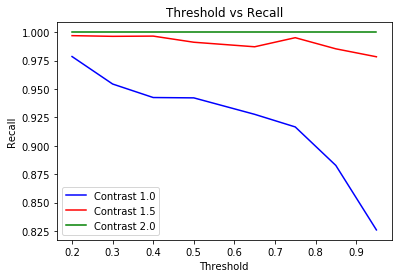

In [17]:
plt.plot(contrast_1.Threshold, contrast_1["Test Re"], color="blue", label="Contrast 1.0")
plt.plot(contrast_15.Threshold, contrast_15["Test Re"], color="red", label="Contrast 1.5")
plt.plot(contrast_2.Threshold, contrast_2["Test Re"], color="green", label="Contrast 2.0")
plt.ylabel("Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Threshold vs Recall")
plt.show()